In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm.autonotebook import tqdm
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go



D:\Program Files\Anaconda 3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# Reading data

In [9]:
df = pd.read_csv("video_game.csv")

In [3]:
df.head(20)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_players,EU_players,JP_players,Other_players,Global_players,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


# Vizualization of game's genre

In [4]:
dff=df['Genre'].value_counts()

trace=go.Pie(labels=dff.index,
            values=dff.values,
            hole=0.3)

layout=go.Layout(title='Fraction of games of each Genre')

fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

# Analysis of Publishers' Information

In [5]:
df=df['Publisher'].value_counts()[:30]

trace=go.Bar(x=df.index,
            y=df.values,
            marker=dict(color='rgba(0,0,255,0.5)',
                       line=dict(color='rgb(0,0,0)',width=1.5)))

layout=go.Layout(title='Number of games released by each Publisher',
                xaxis=dict(title='Publisher'),
                yaxis=dict(title='Number of games released'))

fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

# Number of players

In [10]:
publisher_sales = df[['Publisher', 'NA_players', 'EU_players' , 'JP_players']]
publishers = df.dropna(subset=['Publisher']).groupby('Publisher')[['NA_players', 'EU_players', 'JP_players']].sum().sort_values('NA_players', ascending=False)
publishers['total_revenue'] = publishers[['NA_players', 'EU_players']].sum(axis=1)
display(publishers.head())

,NA_players,EU_players,JP_players,total_revenue
Publisher,,,,
Nintendo,816.97,419.01,458.15,1235.98
Electronic Arts,599.50,373.91,14.35,973.41
Activision,432.59,215.90,6.71,648.49
Sony Computer Entertainment,266.17,186.56,74.15,452.73
Ubisoft,252.74,161.99,7.52,414.73


In [7]:
ds= pd.read_csv("video_game_sales.csv")

In [48]:
ds.head(20)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,31.38,NaN,NaN,NaN,NaN,NaN,1998.0
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,30.26,NaN,NaN,NaN,NaN,NaN,1989.0
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,NaN,NaN,NaN,NaN,NaN,2009.0
9,10,Minecraft,Misc,NaN,PC,Mojang,Mojang AB,10.0,NaN,30.01,NaN,NaN,NaN,NaN,NaN,2010.0


# Sales of games of top Publishers in each year

In [11]:
ea_df=ds[ds['Publisher']=='Electronic Arts'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()
ubisoft_df=ds[ds['Publisher']=='Ubisoft'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()
activision_df=ds[ds['Publisher']=='Activision'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()


trace1=go.Scatter(x=ea_df.index,
                  y=ea_df.values,
                  mode='lines+markers',
                 name='Electronic Arts')
trace2=go.Scatter(x=ubisoft_df.index,
                  y=ubisoft_df.values,
                  mode='lines+markers',
                 name='Ubisoft')
trace3=go.Scatter(x=activision_df.index,
                  y=activision_df.values,
                  mode='lines+markers',
                 name='Activision')


layout=go.Layout(title='Global Sales of games of top Publishers in each year',
                xaxis=dict(title='Year'),
                yaxis=dict(title='Global sales'))

fig=go.Figure(data=[trace1,trace2,trace3],layout=layout)
iplot(fig)

# Sales of top genres in each year

In [12]:
action_df=ds[ds['Genre']=='Action'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()
sports_df=ds[ds['Genre']=='Sports'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()
shooter_df=ds[ds['Genre']=='Shooter'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()
adventure_df=ds[ds['Genre']=='Adventure'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()
racing_df=ds[ds['Genre']=='Racing'][['Global_Sales','Year']].groupby('Year')['Global_Sales'].sum().sort_index()

trace1=go.Scatter(x=action_df.index,
                 y=action_df.values,
                 mode='lines+markers',
                 name='Action')
trace2=go.Scatter(x=sports_df.index,
                 y=sports_df.values,
                 mode='lines+markers',
                 name='Sports')
trace3=go.Scatter(x=shooter_df.index,
                 y=shooter_df.values,
                 mode='lines+markers',
                 name='Shooter')
trace4=go.Scatter(x=adventure_df.index,
                 y=adventure_df.values,
                 mode='lines+markers',
                 name='Adventure')
trace5=go.Scatter(x=racing_df.index,
                 y=racing_df.values,
                 mode='lines+markers',
                 name='Racing')

layout=go.Layout(title='Global Sales of some genres in each year',
                xaxis=dict(title='Year'),
                yaxis=dict(title='Global Sales'))
fig=go.Figure(data=[trace1,trace2,trace3,trace4,trace5],layout=layout)
iplot(fig)

# Influence of Critic Score and User Score on Global Sales

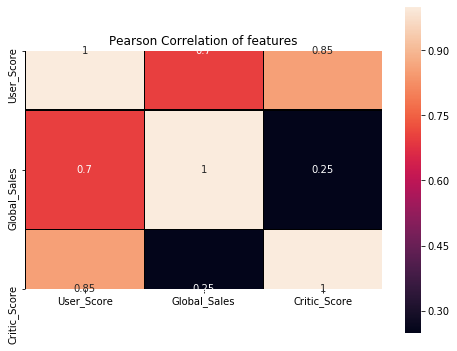

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(ds.loc[ds['Publisher']=='Electronic Arts',['User_Score','Global_Sales','Critic_Score']].corr(), 
            linewidths=0.25,
            vmax=1.0, 
            square=True,  
            linecolor='k', 
            annot=True)
plt.show()

In [14]:
#data cleaning
ds.dropna(subset = ["User_Score","Critic_Score","Global_Sales"], inplace=True)

In [15]:
ds.head(145)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
49,50,Call of Duty: Modern Warfare 2,Shooter,M,X360,Activision,Infinity Ward,9.5,9.0,NaN,13.53,8.54,3.63,0.08,1.28,2009.0
79,80,Grand Theft Auto IV,Action,M,PS3,Rockstar Games,Rockstar North,10.0,9.0,NaN,10.57,4.79,3.73,0.44,1.62,2008.0
94,95,Call of Duty 4: Modern Warfare,Shooter,M,X360,Activision,Infinity Ward,9.6,9.0,NaN,9.41,5.98,2.39,0.13,0.91,2007.0
107,108,Grand Theft Auto V,Action,M,XOne,Rockstar Games,Rockstar North,9.0,9.0,NaN,8.72,4.70,3.25,0.01,0.76,2014.0
130,131,Call of Duty: World at War,Shooter,M,X360,Activision,Treyarch,8.5,7.8,NaN,7.50,4.88,1.91,NaN,0.71,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16871,16872,Penny-Punching Princess,Misc,T,NS,NIS America,Nippon Ichi Software,6.5,9.0,NaN,0.03,0.03,NaN,NaN,0.00,2018.0
17602,17603,Left 4 Dead,Shooter,M,PC,Valve Corporation,Valve Software,8.6,8.5,NaN,0.02,NaN,0.02,NaN,0.00,2008.0
17648,17649,Mount & Blade,Role-Playing,T,PC,Paradox Interactive,Taleworlds,7.2,8.8,NaN,0.02,NaN,0.02,NaN,0.00,2008.0
17898,17899,Runner3,Platform,E10,NS,Nicalis,Choice Provisions,7.5,9.0,NaN,0.02,0.02,NaN,NaN,0.00,2018.0


In [16]:
#calculating the mean of global sales
avg=ds.Global_Sales.mean();
avg

1.882183098591549

# Impact of Critic Score and User Score on Global Sales

In [17]:
a = 0
b = 0

for index, row in ds.iterrows():
    if((avg<=row['Global_Sales'])&(row['Critic_Score']>row['User_Score'])):
        a=a+1
    if((avg<=row['Global_Sales'])&(row['Critic_Score']<row['User_Score'])):
        b=b+1   
    
    
print(a)
print(b)

20
22


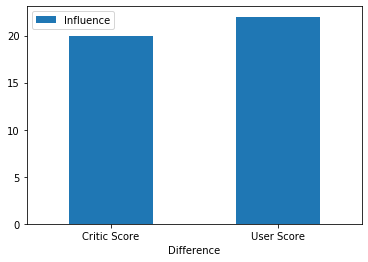

In [18]:
dfff = pd.DataFrame({'Difference':['Critic Score', 'User Score'], 'Influence':[20, 22]})
ax = dfff.plot.bar(x='Difference', y='Influence', rot=0)

In [19]:
a = 0
b = 0

for index, row in ds.iterrows():
    if((avg>row['Global_Sales'])&(row['Critic_Score']>row['User_Score'])):
        a=a+1
    if((avg>row['Global_Sales'])&(row['Critic_Score']<row['User_Score'])):
        b=b+1   
    
    
print(a)
print(b)

23
72


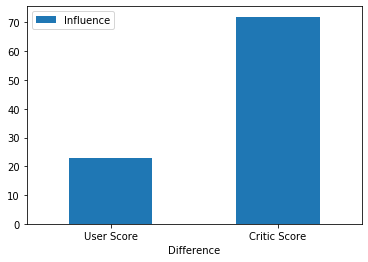

In [20]:
dfff = pd.DataFrame({'Difference':['User Score', 'Critic Score'], 'Influence':[23, 72]})
ax = dfff.plot.bar(x='Difference', y='Influence', rot=0)


# Creation of Variables

In [21]:
url = 'https://www.metacritic.com/game/'
headers = {"User-Agent": "Mozilla/5.001 (windows; U; NT4.0; en-US; rv:1.0) Gecko/25250101"}
data2 = pd.read_excel('games_evaluation.xlsx')

In [22]:
data2.head(20)

,Name,Game story,Interface,Gameplay,Music,Optimization,Atmosphere
0,Battlefield V,5.7,7.5,7.1,6.7,6.5,7.3
1,Mafia III,6.1,6.7,6.5,7.3,5.4,6.2
2,No Man's Sky,4.9,5.4,5.6,6.1,5.8,5.5
3,Watch Dogs,4.3,6.5,6.3,6.1,6.1,6.3
4,Assassin's Creed: Unity,7.0,7.0,6.4,7.1,5.2,7.1
5,Call of Duty: Advanced Warfare,6.6,7.6,7.3,6.5,6.7,7.0
6,Fallout 76,4.7,5.3,5.6,5.7,5.0,4.9
7,Batman: Arkham Knight,8.1,7.9,7.5,6.9,6.4,7.7
8,Warcraft III: Reforged,7.5,6.0,5.0,5.9,6.1,6.5
9,Aliens: Colonial Marines,5.1,6.1,5.8,5.9,6.5,6.2


# Parsing Information from MetaCritic

In [23]:
scores = data2.copy()[['Name']].append(data2.copy()[['Name']]).append(data2.copy()[['Name']]).sort_values(by='Name').reset_index(drop=True)
platforms = ['playstation-4', 'xbox-one', 'pc']
scores['Platform'] = scores.apply(lambda row: platforms[row.name % 3], axis=1)
scores['Critic_Score'] = np.array(57)
scores['User_Score'] = np.array(57)

scores = scores.set_index(['Name', 'Platform'])
for name in tqdm(scores.index):
    game_url = name[0].strip().lower().replace(' ', '-').replace("'", '').replace(':', '')
    platform = name[1]
    if platform == 'pc' and name[0] == 'Destiny':
        continue
    html = requests.get(url + platform + '/' + game_url, headers=headers)
    if html.ok:
        soup = BeautifulSoup(html.text, 'html.parser')
        scores.loc[name, 'Critic_Score'] = soup.select('div[class*="metascore_w xlarge game"]')[0].text
        scores.loc[name, 'User_Score'] = soup.select('div[class*="metascore_w user large game"]')[0].text

scores = scores.loc[scores.apply(lambda row: row.Critic_Score != row.User_Score, axis=1)].reset_index()

In [24]:
convert_dict = {'Critic_Score': int, 'User_Score': float}
scores = scores.astype(convert_dict)
scores = scores.groupby('Name')[['Critic_Score', 'User_Score']].aggregate('mean')
scores.loc[:, 'User_Score'] = scores['User_Score'] * 10
scores.loc[:, ['Critic_Score', 'User_Score']] = np.floor(scores.values)
scores = scores.reset_index()
scores

,Name,Critic_Score,User_Score
0,Agents of mayhem,67.0,62.0
1,Aliens: Colonial Marines,45.0,35.0
2,Anthem,59.0,37.0
3,Assassin's Creed: Unity,70.0,44.0
4,Batman: Arkham Knight,80.0,60.0
5,Battlefield V,77.0,26.0
6,Call of Duty: Advanced Warfare,80.0,52.0
7,Destiny,75.0,58.0
8,Fallout 4,86.0,62.0
9,Fallout 76,51.0,29.0


In [25]:
overall = pd.merge(data2, scores, how='left', on='Name')

In [26]:
display(pd.DataFrame({
    'Name': data2['Name'],
    'Rate':data2.iloc[:, 1:7].mean(axis=1)
}))

,Name,Rate
0,Battlefield V,6.800000
1,Mafia III,6.366667
2,No Man's Sky,5.550000
3,Watch Dogs,5.933333
4,Assassin's Creed: Unity,6.633333
5,Call of Duty: Advanced Warfare,6.950000
6,Fallout 76,5.200000
7,Batman: Arkham Knight,7.416667
8,Warcraft III: Reforged,6.166667
9,Aliens: Colonial Marines,5.933333


# Rating by criteria and frequency

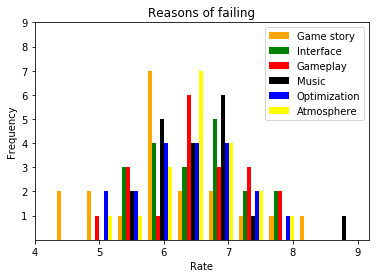

In [27]:
plt.hist(data2.iloc[:, 1:7].values,
         color=['orange', 'green' ,'red', 'black', 'blue', 'yellow'])
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.legend(data2.columns[1:7])
plt.xticks(range(4, 10))
plt.yticks(range(1, 10))
plt.title('Reasons of failing')
plt.show()

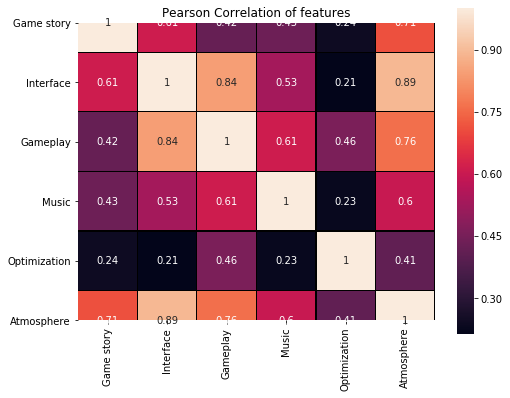

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(data2.iloc[:, 1:7].corr(), 
            linewidths=0.25,
            vmax=1.0, 
            square=True,  
            linecolor='k', 
            annot=True)
plt.show()

# Showing the criteria that most affected the fail using Random Forest

D:\Program Files\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

D:\Program Files\Anaconda 3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



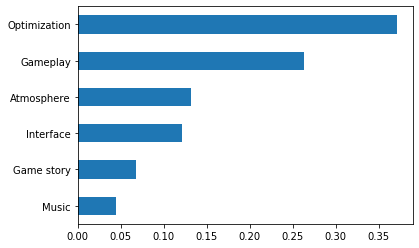

In [31]:
X = overall[['Game story', 'Interface', 'Gameplay', 'Music', 'Optimization', 'Atmosphere']]  #independent columns
y = overall[['User_Score']]    #target column i.e price range
model = RandomForestRegressor()
model.fit(X,y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(6).plot(kind='barh')
plt.show()